#  Titanic - Survival Prediction Project

##  Project Objective
The goal of this project is to build a machine learning model that predicts whether a passenger survived the Titanic disaster based on features such as age, sex, ticket class, and more.

---

##  1. Data Loading and Exploration
In this section, we load the `train.csv` dataset to understand its structure, explore distributions, and identify any issues such as missing values or irrelevant columns.

---

##  2. Data Preprocessing
- Handling missing values (`Age`, `Embarked`)
- Encoding categorical variables (`Sex`, `Embarked`)
- Feature engineering:
  - Extracting titles from names (`Title`)
  - Grouping age into bins (`AgeGroup`)

---

##  3. Model Building and Evaluation
We train a Random Forest classifier and evaluate its performance using cross-validation to ensure robustness.

---

##  4. Final Predictions and Submission File
The model is applied to the test dataset, and the predictions are saved into `submission.csv` for submission to Kaggle.

---

##  5. Conclusion
We built a simple but effective model to predict survival on the Titanic. The cross-validation accuracy was approximately **(fill in your model's score)**.

Possible improvements:
- Hyperparameter tuning using GridSearchCV
- Trying advanced models like XGBoost or CatBoost
- More in-depth feature analysis and visualization


In [3]:
import pandas as pd

# Load the CSV files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Show first 5 rows
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Afficher les infos générales du dataset
train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


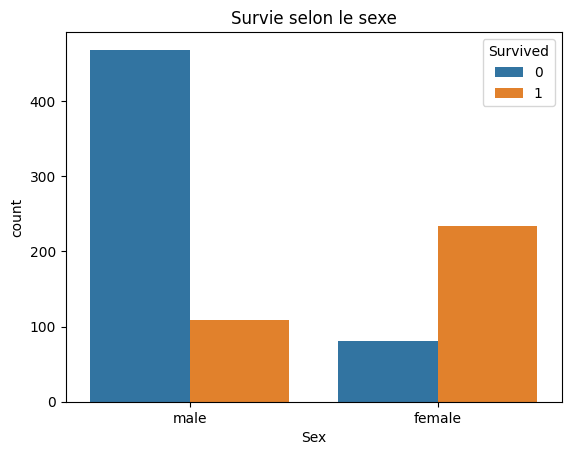

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=train, x='Sex', hue='Survived')
plt.title("Survie selon le sexe")
plt.show()


In [7]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)


/var/folders/b8/b49741p56ms_s7ptwq69t_kr0000gn/T/ipykernel_93452/3544878041.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
/var/folders/b8/b49741p56ms_s7ptwq69t_kr0000gn/T/ipykernel_93452/3544878041.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

In [9]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)


/var/folders/b8/b49741p56ms_s7ptwq69t_kr0000gn/T/ipykernel_93452/4055762640.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)


In [10]:
# Encoder 'Sex' en 0 et 1
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

# Encoder 'Embarked' avec One-Hot Encoding
train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)
test = pd.get_dummies(test, columns=['Embarked'], drop_first=True)


In [11]:
# Sélection des colonnes utiles (features)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']

X = train[features]
y = train['Survived']



In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Séparer en données d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Prédire sur les données de validation
y_pred = model.predict(X_val)

# Évaluer la performance
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))



Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [14]:
# Extraire le titre (Mr, Mrs, Miss, etc.) depuis la colonne 'Name'
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Regrouper les titres rares en 'Rare'
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 
               'Sir', 'Jonkheer', 'Dona']

train['Title'] = train['Title'].replace(rare_titles, 'Rare')
test['Title'] = test['Title'].replace(rare_titles, 'Rare')

# Regrouper les titres similaires
train['Title'] = train['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})
test['Title'] = test['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

# Convertir en variables catégorielles avec one-hot encoding
train = pd.get_dummies(train, columns=['Title'], drop_first=True)
test = pd.get_dummies(test, columns=['Title'], drop_first=True)


In [15]:
bins = [0, 12, 20, 40, 60, 80]
labels = ['Child', 'Teenager', 'Adult', 'Senior', 'Elder']

train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels)
test['AgeGroup'] = pd.cut(test['Age'], bins=bins, labels=labels)

# One-hot encoder AgeGroup
train = pd.get_dummies(train, columns=['AgeGroup'], drop_first=True)
test = pd.get_dummies(test, columns=['AgeGroup'], drop_first=True)


In [16]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
            'Embarked_Q', 'Embarked_S']  # de base

# Ajouter les titres extraits (toutes les colonnes Title_*)
features += [col for col in train.columns if col.startswith('Title_')]

# Ajouter les groupes d’âge (AgeGroup_*)
features += [col for col in train.columns if col.startswith('AgeGroup_')]

# S’assurer que test a les mêmes colonnes (parfois il manque des colonnes rares)
for col in features:
    if col not in test.columns:
        test[col] = 0

X = train[features]
y = train['Survived']
X_test = test[features]


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(n_estimators=100, random_state=42)

# Cross-validation pour évaluer la robustesse
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("CV Accuracy scores:", scores)
print("Mean CV Accuracy:", scores.mean())

# Entraîner sur toutes les données
model.fit(X, y)


CV Accuracy scores: [0.79329609 0.78651685 0.84269663 0.7752809  0.80337079]
Mean CV Accuracy: 0.80023225158496


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [18]:
predictions = model.predict(X_test)


In [19]:
submission = pd.read_csv('gender_submission.csv')  # Fichier fourni par Kaggle
submission['Survived'] = predictions
submission.to_csv('submission.csv', index=False)


In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best params: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best score: 0.8338961772644529


In [21]:
# Extraire le titre (Mr, Mrs, Miss, etc.) depuis la colonne 'Name'
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Regrouper les titres rares en 'Rare'
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 
               'Sir', 'Jonkheer', 'Dona']

train['Title'] = train['Title'].replace(rare_titles, 'Rare')
test['Title'] = test['Title'].replace(rare_titles, 'Rare')

# Regrouper les titres similaires
train['Title'] = train['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})
test['Title'] = test['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

# Convertir en variables catégorielles avec one-hot encoding
train = pd.get_dummies(train, columns=['Title'], drop_first=True)
test = pd.get_dummies(test, columns=['Title'], drop_first=True)


In [22]:
bins = [0, 12, 20, 40, 60, 80]
labels = ['Child', 'Teenager', 'Adult', 'Senior', 'Elder']

train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels)
test['AgeGroup'] = pd.cut(test['Age'], bins=bins, labels=labels)

# One-hot encoder AgeGroup
train = pd.get_dummies(train, columns=['AgeGroup'], drop_first=True)
test = pd.get_dummies(test, columns=['AgeGroup'], drop_first=True)


In [23]:
# Colonnes de base
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']

# Ajouter les colonnes Title_* (features créées à l’étape 1)
features += [col for col in train.columns if col.startswith('Title_')]

# Ajouter les colonnes AgeGroup_* (features créées à l’étape 2)
features += [col for col in train.columns if col.startswith('AgeGroup_')]

# S’assurer que le jeu test a bien toutes ces colonnes
for col in features:
    if col not in test.columns:
        test[col] = 0

# Définir X et y pour l’entraînement
X = train[features]
y = train['Survived']

# Jeu test pour prédiction finale
X_test = test[features]


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(n_estimators=100, random_state=42)

# Évaluer avec cross-validation (5 folds)
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Scores de cross-validation :", scores)
print("Moyenne des scores :", scores.mean())

# Entraîner le modèle sur tout le jeu d’entraînement
model.fit(X, y)


Scores de cross-validation : [0.78212291 0.78089888 0.8258427  0.76966292 0.80337079]
Moyenne des scores : 0.7923796371853619


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
predictions = model.predict(X_test)


In [26]:
submission = pd.read_csv('gender_submission.csv')  # Ce fichier est fourni par Kaggle
submission['Survived'] = predictions
submission.to_csv('submission.csv', index=False)
